# Import Libraries Used

In [119]:
%matplotlib inline  

import pandas as pd
import numpy as np
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20.0, 10.0)

def histvstarget(attribute, target, data):
    data[attribute].astype(float)
    total = data[[attribute, target]].groupby([attribute],as_index=False, sort=True).count()
    fig, ax1 = plt.subplots(1,1,figsize=(16,5))
    sns.barplot(x=attribute, y=target, data=total, ax=ax1)
    ax1.set(xlabel=attribute, ylabel=target)

def distribution(attribute, data):
    att = data[attribute]
    sns.distplot(att)
    


# Import the Data

In [120]:
data_info = pd.DataFrame({
    "Attributes": ["Pregnancies", "Glucose", "BloodPressure", 
              "SkinThickness", "Insulin", "BMI", 
              "DiabetesPedigreeFunction", "Age", "Outcome"],
    "Explanation": ["Number of times pregnant", 
                 "Plasma glucose concentration a 2 hours in an oral glucose tolerance test", 
                 "Diastolic blood pressure (mm Hg)", 
                "Triceps skin fold thickness (mm)", 
                 "2-Hour serum insulin (mu U/ml)",
                 "Body mass index (weight in kg/(height in m)^2)", 
              "Diabetes pedigree function"
                 ,"years",
                   "Diabetes or not"]})

data = pd.read_csv('Input/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [121]:
data_info

,Attributes,Explanation
0,Pregnancies,Number of times pregnant
1,Glucose,Plasma glucose concentration a 2 hours in an o...
2,BloodPressure,Diastolic blood pressure (mm Hg)
3,SkinThickness,Triceps skin fold thickness (mm)
4,Insulin,2-Hour serum insulin (mu U/ml)
5,BMI,Body mass index (weight in kg/(height in m)^2)
6,DiabetesPedigreeFunction,Diabetes pedigree function
7,Age,years
8,Outcome,Diabetes or not


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Exploring the Data

## Missing values

In [123]:
data.isnull().sum() # Number of missing values.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No missing values: Great!

## Pregnancies

### Distribution

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

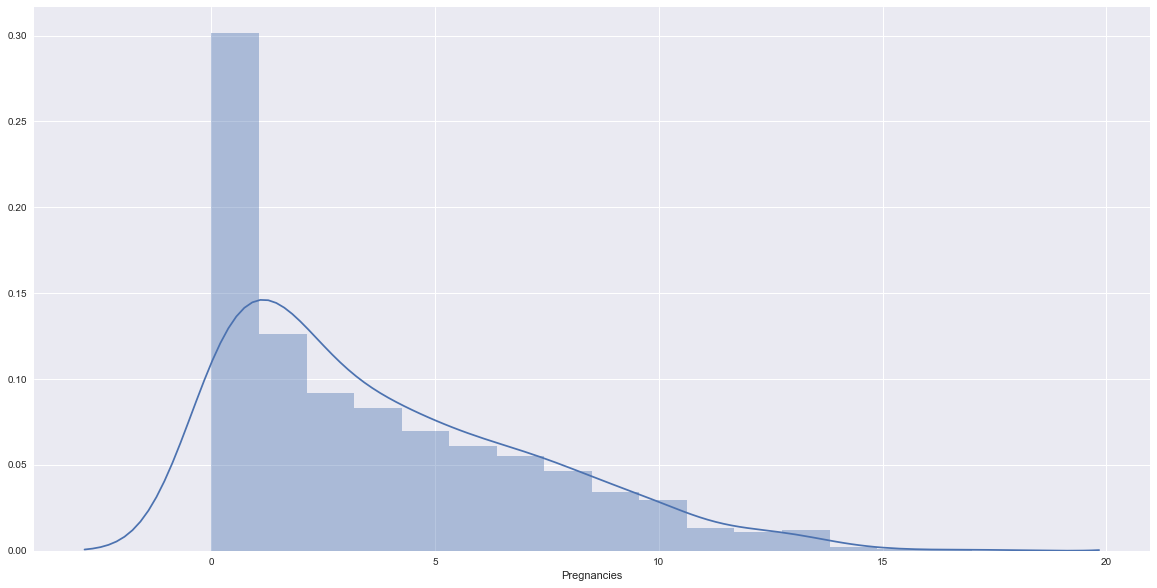

In [124]:
distribution("Pregnancies", data)
data["Pregnancies"].describe()

Distribution is positively skewed. 

### Relationship to outcome

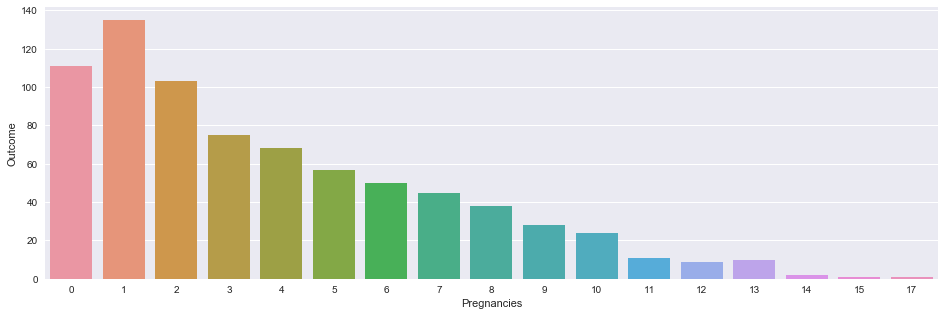

In [125]:
histvstarget("Pregnancies", "Outcome",data)

The outcome of diabetes seems to decrease with number of pregnancies.

## Glucose

### Distribution

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

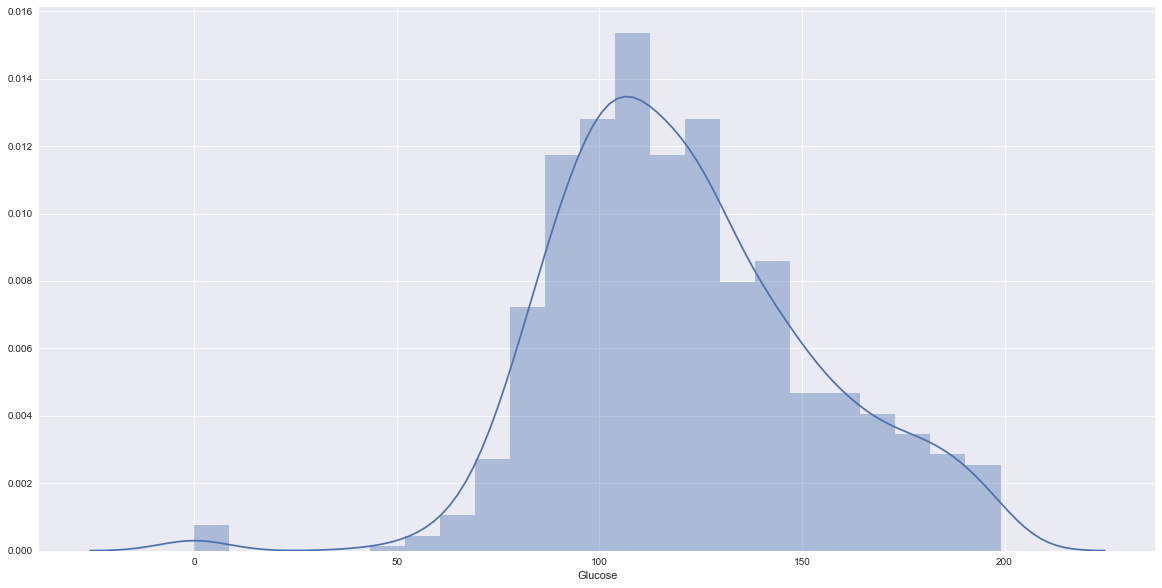

In [126]:
distribution("Glucose", data)
data["Glucose"].describe()

Again positivly skewed with outliers to the left. Those zeros might be missing values, a Glucose concentration of 0 is unrealistic. Lets mark them with NaN instead.

In [127]:
data["Glucose"] = data["Glucose"].replace(0, np.nan)
data["Glucose"].isnull().sum() # Number of missing values.

5

### Relationship to outcome

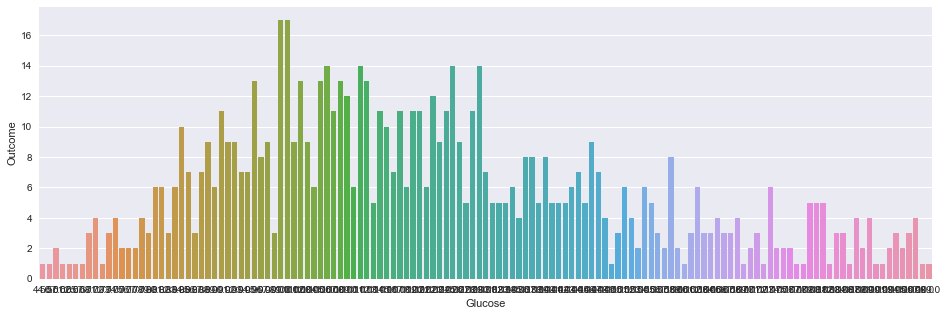

In [128]:
histvstarget("Glucose", "Outcome",data)

Very uniform with some kind of center of mass to the left, can't draw any conclusion by eye.

## BloodPressure

### Distribution

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

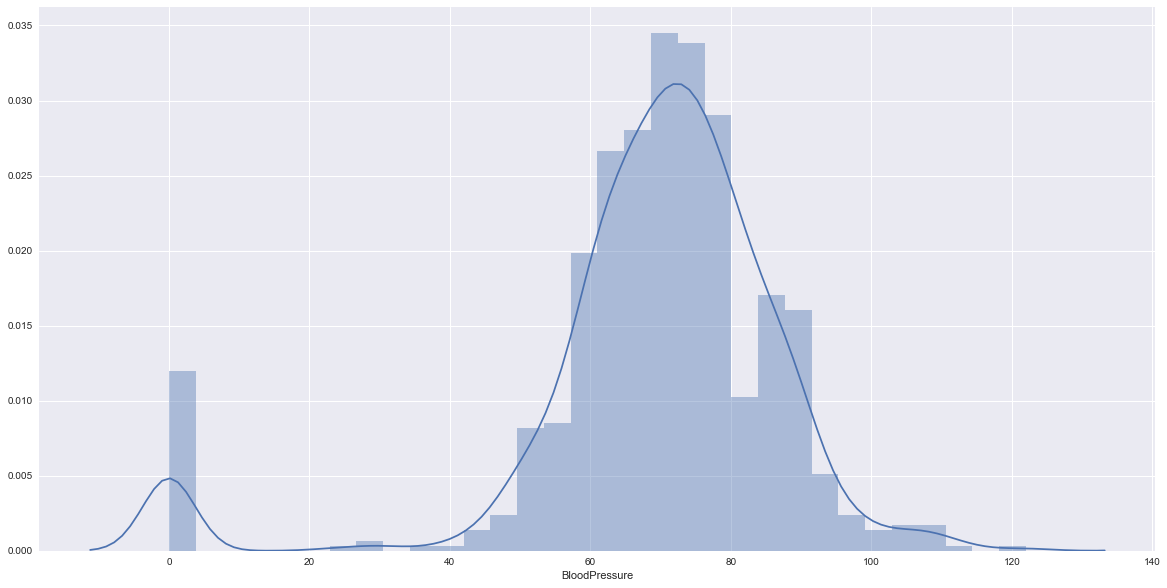

In [129]:
distribution("BloodPressure", data)
data["BloodPressure"].describe()

Looks fairly normal but a blood pressure of 0 occurs. This is probably a missing value since you cant have a blood pressure and be alive at the same time. Lets mark it with a NaN instead.

In [130]:
data["BloodPressure"] = data["BloodPressure"].replace(0, np.nan)
data["BloodPressure"].isnull().sum() # Number of missing values.

35

### Relationship to outcome

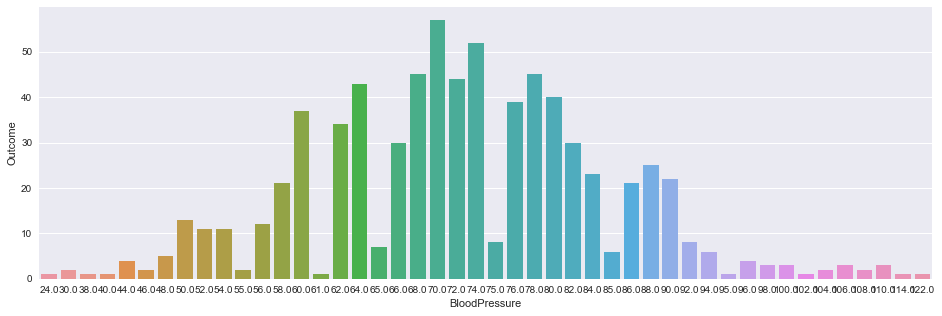

In [131]:
histvstarget("BloodPressure", "Outcome",data)

Center of mass towards the middle.

 ## SkinThickness

### Distribution

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

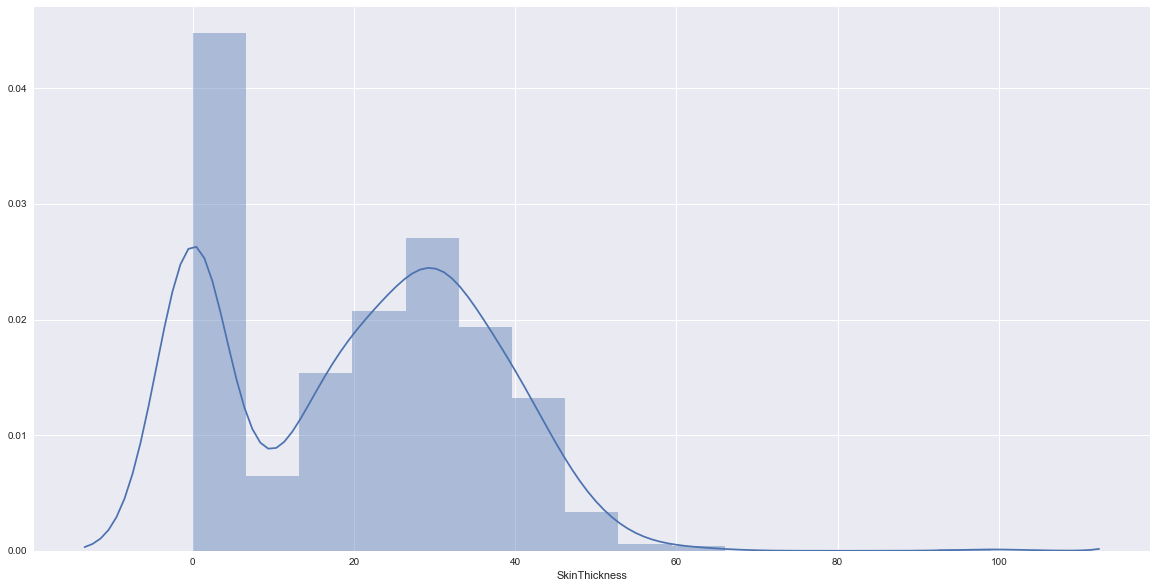

In [132]:
distribution("SkinThickness", data)
data["SkinThickness"].describe()

Again we are encountered with 0 values, a value of 0 skin thickness is not realistic. Replace it with NaN.

In [133]:
data["SkinThickness"] = data["SkinThickness"].replace(0, np.nan)
data["SkinThickness"].isnull().sum() # Number of missing values.

227

### Relationship to outcome

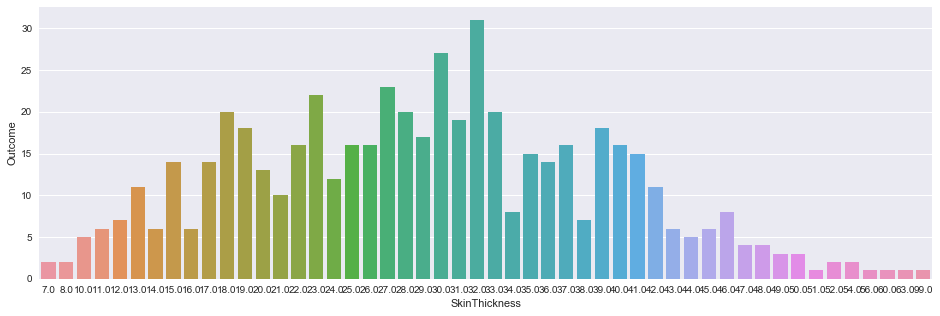

In [134]:
histvstarget("SkinThickness", "Outcome",data)

Center of mass towards the middle but with large variation. 

## Insulin

### Distribution

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

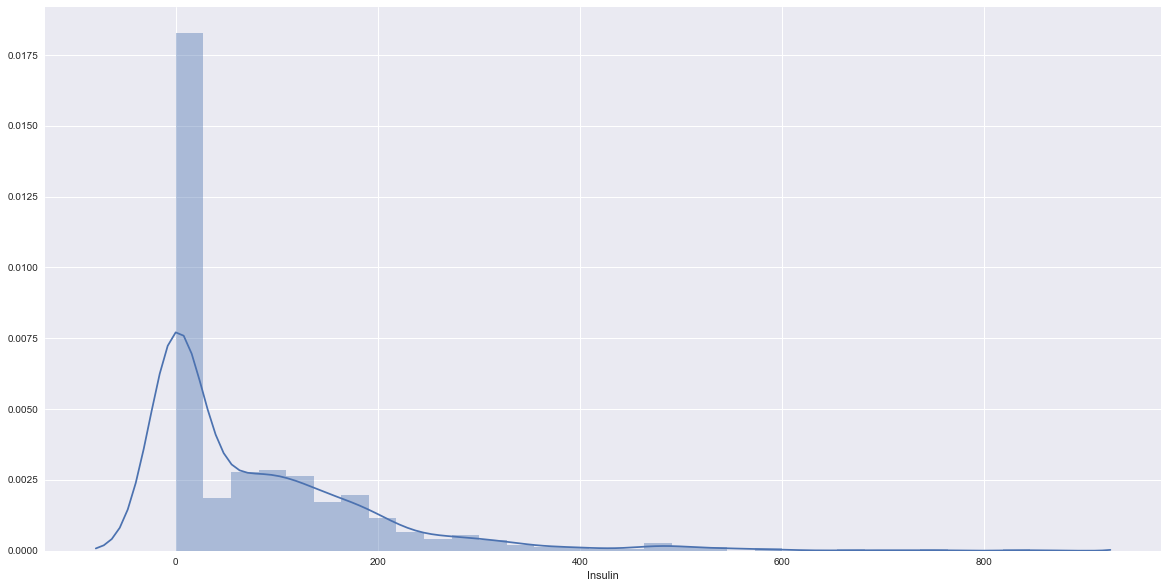

In [135]:
distribution("Insulin", data)
data["Insulin"].describe()

Again we have invalid zero values, replace with NaN.

In [136]:
data["Insulin"] = data["Insulin"].replace(0, np.nan)
data["Insulin"].isnull().sum() # Number of missing values.

374

### Relationship to outcome

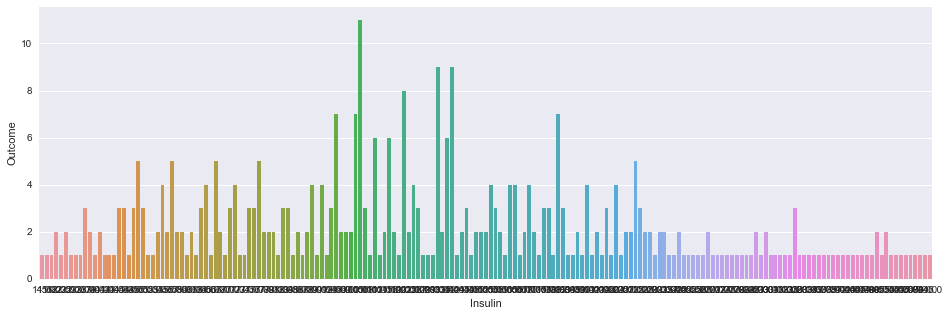

In [137]:
histvstarget("Insulin", "Outcome",data)

Almost completely uniform with some peaks, hard to draw any conclusions.

## BMI

### Distribution

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

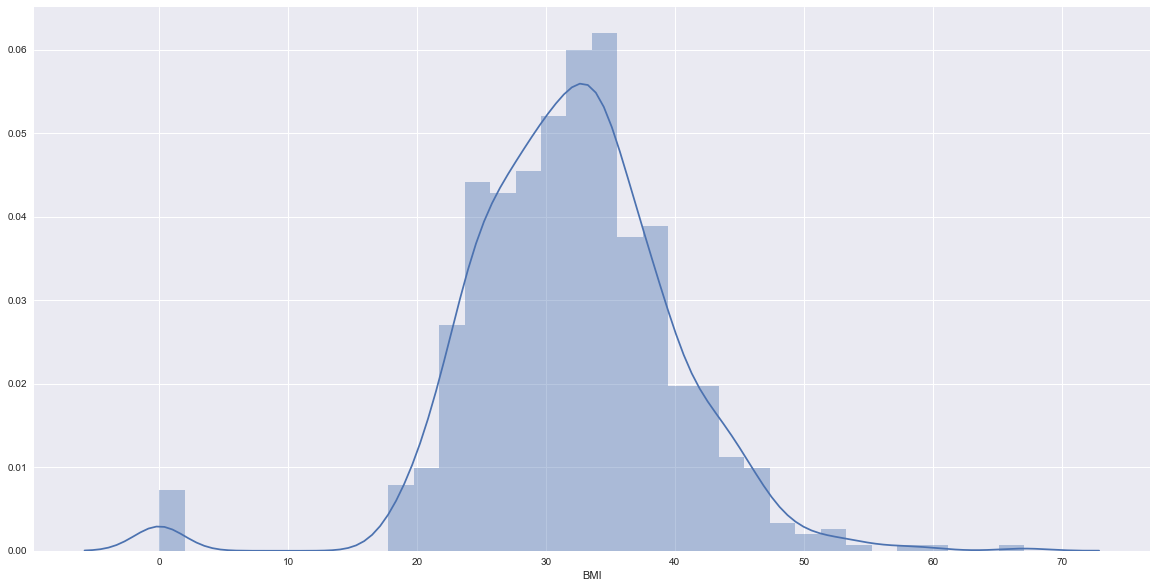

In [138]:
distribution("BMI", data)
data["BMI"].describe()

Missing values. Replace with NaN.

In [139]:
data["BMI"] = data["BMI"].replace(0, np.nan)
data["BMI"].isnull().sum() # Number of missing values.

11

### Relationship to outcome


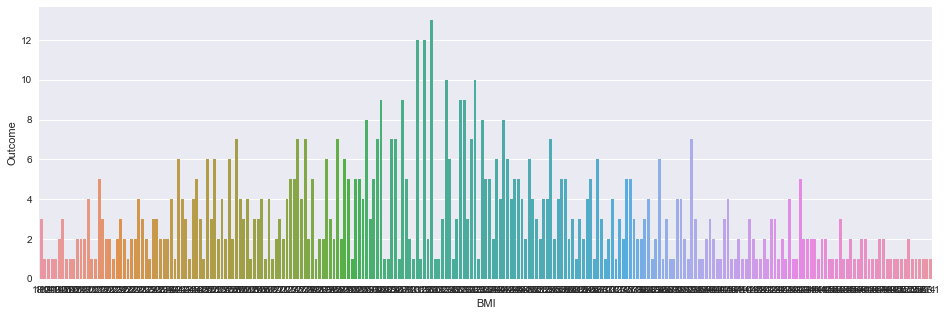

In [140]:
histvstarget("BMI", "Outcome",data)

Uniform with some peaks, some kind of centre of mass towards the middle.

## DiabetesPedigreeFunction

### Distribution

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

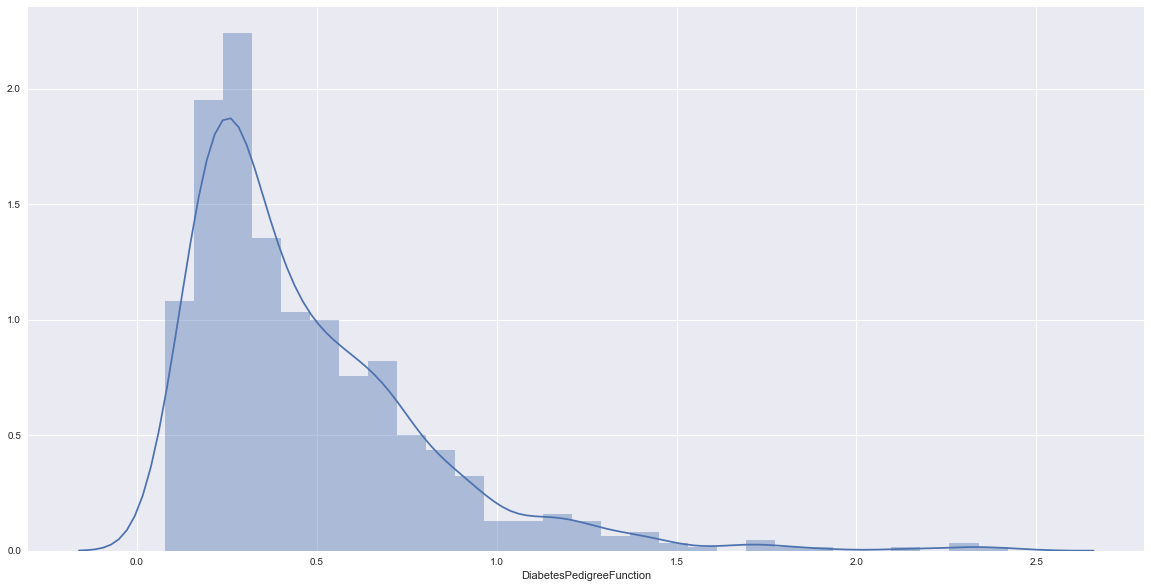

In [141]:
distribution("DiabetesPedigreeFunction", data)
data["DiabetesPedigreeFunction"].describe()

Distribution is positively skewed, and subject to outliers.

### Relationship to outcome

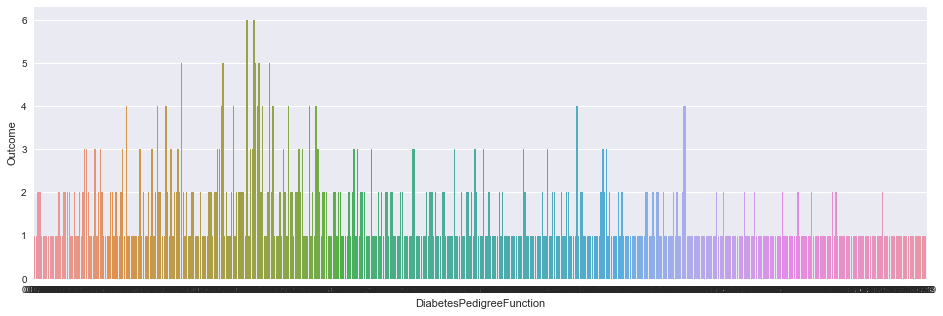

In [142]:
histvstarget("DiabetesPedigreeFunction", "Outcome",data)

Uniform but with some kind of centre of mass towards the left.

## Age

### Distribution

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

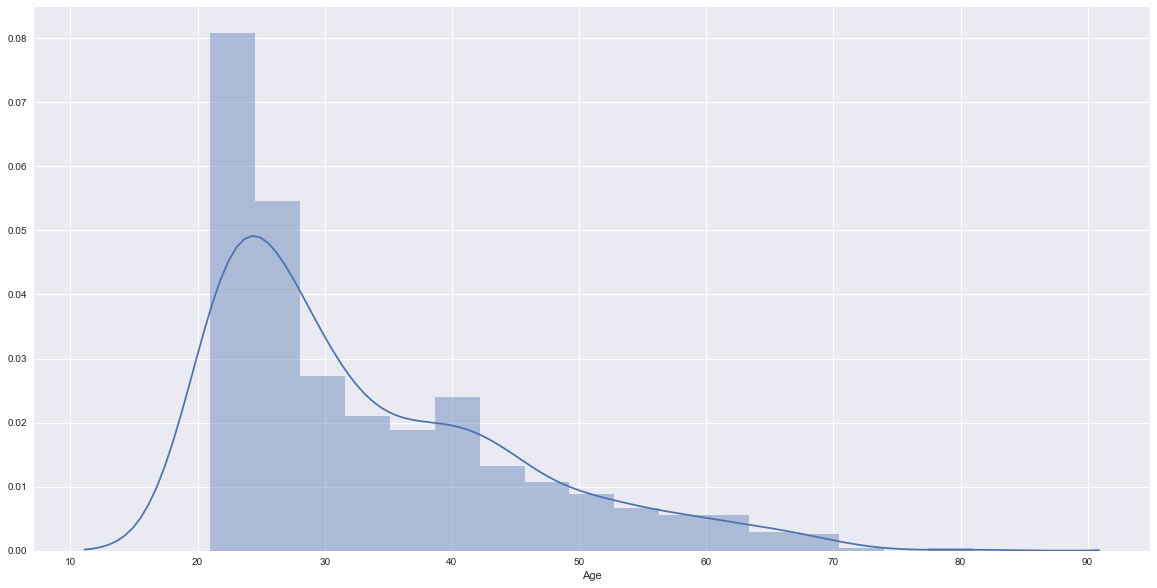

In [143]:
distribution("Age", data)
data["Age"].describe()

Distribution is positively skewed.

### Relationship to outcome

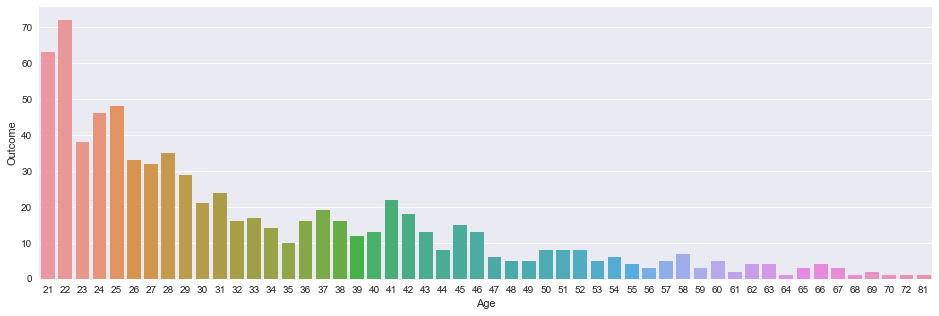

In [144]:
histvstarget("Age", "Outcome",data)

The outcome for diabetes looks more likely if you're younger.

# Correlation

In [145]:
datanoNan = data.dropna(axis=0) # Drop NaN's since not useful.
datanoNan.shape

(392, 9)

Unfortunatly we lost a lot of data dropping samples with missing values.

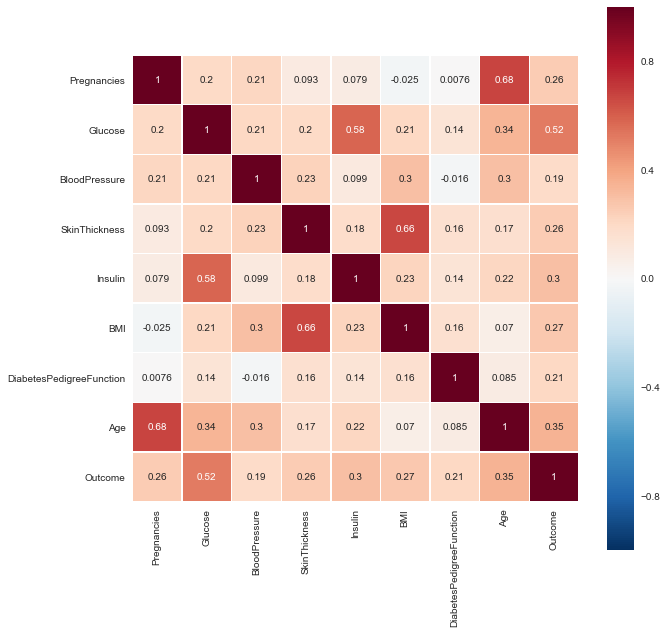

In [148]:
corrmat = datanoNan.corr() # Correlation matrix.
f, ax = plt.subplots(figsize=(10, 10))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)

We notice high correlations between Age and pregnecies, which is logical. Also between BMI and Skin thickness, Glucose and Insulin as well as Glucose and Outcome.

# Attribute selection

Lets have a look at the importance of the attributes features for predicting the outcome. We might be able to remove attributes with a lot of missing values and hence increase our sample-size. 

## PCA & LDA

### Pricipal component analysis.

In [152]:
from sklearn.decomposition import PCA
test = datanoNan["Outcome"]
train = datanoNan.drop(["Outcome"], axis=1)

The cumulative explained variance ratio as a function of the number of PC used:

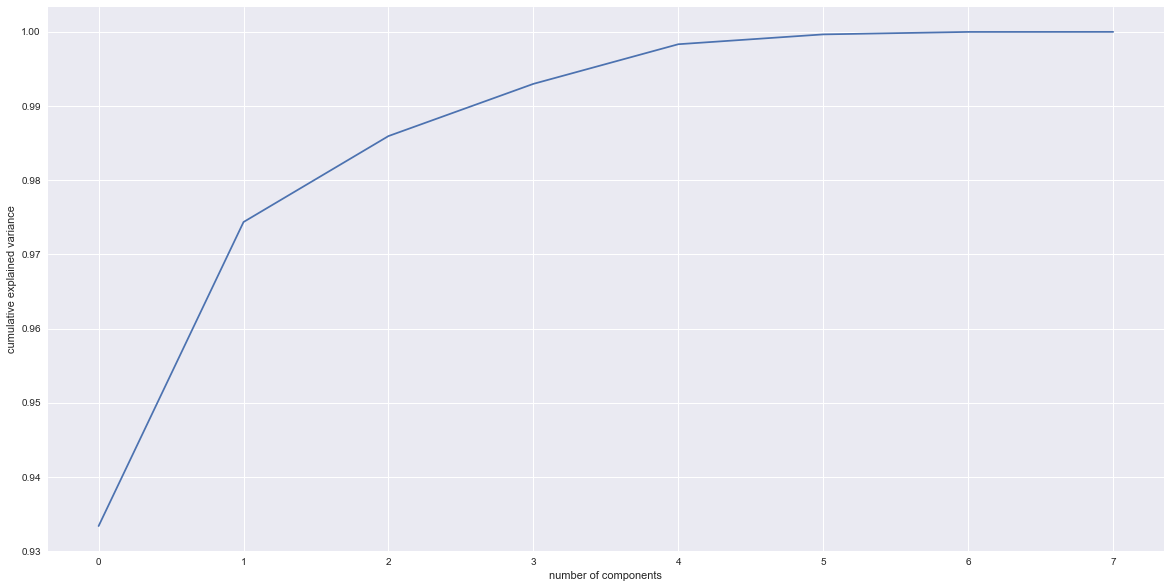

In [153]:
pca = PCA().fit(train.values)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

So the first 2 components contain almost 99% of the variance. Lets try to plot the outcomes based on the two components.

(392, 2)


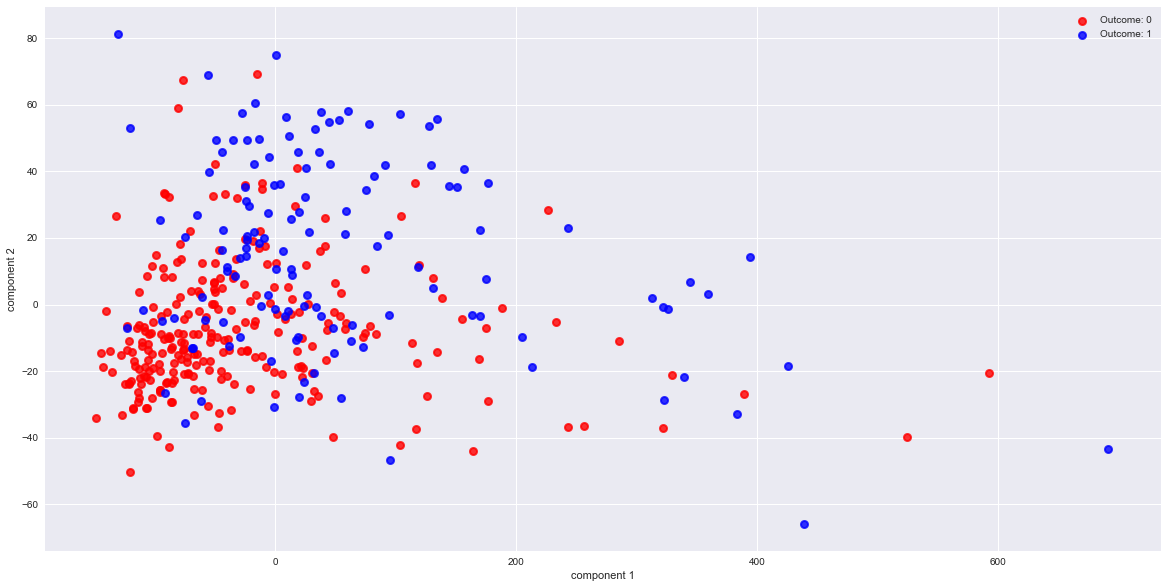

In [182]:
pca = PCA(n_components=2)
projected = pca.fit_transform(train.values)
print(projected.shape)

for color, i, t in zip(['red', 'blue'], [0, 1], test,):
    plt.scatter(projected[test == i, 0], projected[test == i, 1], color=color, alpha=.8, lw=2,
                label= "Outcome: " + str(i))
plt.legend(loc='best', scatterpoints=1)
plt.xlabel('component 1')
plt.ylabel('component 2')

This does separate the data to some degree, but not nearly enough. Instead we look at which components is choosen for N=5, that should cover 100 percent of the variance.

In [166]:
pca = PCA(n_components=5)
projected = pca.fit_transform(train.values)

### Linear Discriminant Analysis

In contrast to PCA that dentifies the combination of attributes that accounts for the most variance. LDA identifies attributes that account for the most variance between classes. Hence LDA is supervised.

In [186]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=4)
project = lda.fit(train, test).transform(train)
print(project)

[[ -1.82039815e+00]
 [  1.95723109e+00]
 [ -1.64426985e+00]
 [  2.17029507e+00]
 [  1.85946468e+00]
 [  1.51961107e+00]
 [  3.24696202e-01]
 [ -3.54595340e-01]
 [ -2.14513020e-01]
 [  4.11953523e-01]
 [  1.55056477e+00]
 [  4.13304505e-01]
 [ -1.63036390e+00]
 [  1.18794882e+00]
 [  1.08894164e+00]
 [ -1.84406274e+00]
 [ -5.24871086e-01]
 [  1.24605170e+00]
 [  1.36920189e+00]
 [  2.89055678e+00]
 [ -1.60874386e+00]
 [ -1.28935489e+00]
 [ -1.38959677e+00]
 [  2.45337412e+00]
 [  1.48267667e+00]
 [  2.31138760e+00]
 [  3.04219250e-01]
 [ -7.26709046e-01]
 [  1.22202851e-01]
 [ -1.82448066e+00]
 [  2.16810031e-01]
 [ -5.96098511e-01]
 [  2.24171771e-01]
 [ -2.31735058e-01]
 [ -7.44800258e-01]
 [ -4.25947676e-01]
 [ -7.47775305e-01]
 [  1.32857003e+00]
 [ -8.25003868e-02]
 [ -1.59084068e-01]
 [  7.97954804e-03]
 [  7.95913423e-01]
 [ -2.55052064e+00]
 [ -1.14320337e+00]
 [  5.37176803e-01]
 [ -1.95753874e+00]
 [ -2.84784221e-01]
 [  4.94018893e-01]
 [ -1.29609431e+00]
 [ -1.13451045e+00]


Lets try to plot the outcomes based on the two components.

In [183]:
for color, i, t in zip(['red', 'blue'], [0, 1], test,):
    plt.scatter(project[test == i, 0], project[test == i, ], color=color, alpha=.8, lw=2,
                label= "Outcome: " + str(i))
plt.legend(loc='best', scatterpoints=1)
plt.xlabel('component 1')
plt.ylabel('component 2')

IndexError: index 1 is out of bounds for axis 1 with size 1